<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/galaxy_NGC_6975.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Galaxy NGC 6975**

[NGC 6975](https://en.wikipedia.org/wiki/NGC_6975) also known as NGC 6976, is a spiral galaxy in the constellation Aquarius. The object was discovered on 12 July 1864 by the German astronomer Albert Marth. NGC 6975 is part of [Hickson Compact Group 88](https://en.wikipedia.org/wiki/Hickson_Compact_Group), along with NGC 6977, NGC 6978, and MCG-01-53-014. The group is at a distance of about 273 million light years (84 million parsecs). In 2012, supernova SN 2012ga was discovered within NGC 6975.

In [ ]:
!pip install astropy astroquery lightkurve -q
from astroquery.ned import Ned
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

*Load composite RGB FITS from source (and ZScaleInterval)*

**Stretch and scale individual layers of the RGB image to better display galaxies**

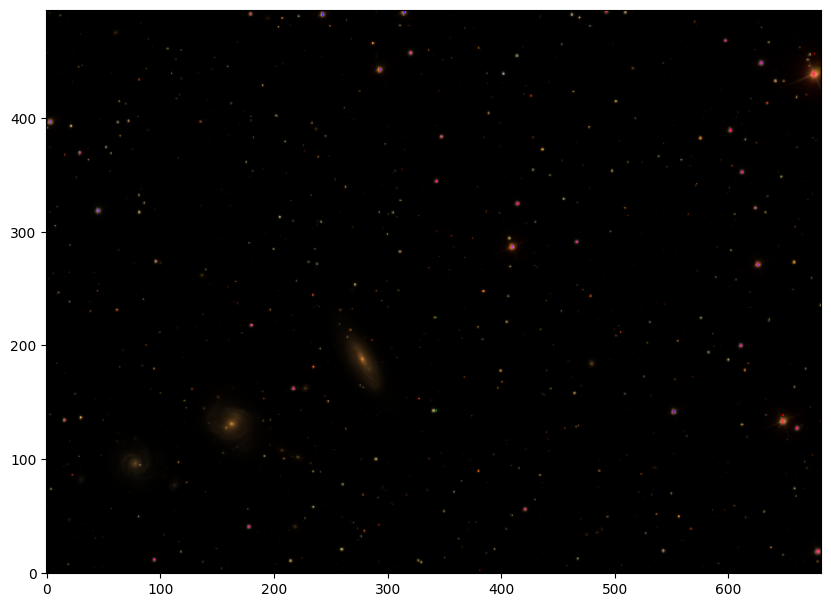

In [ ]:
# https://docs.astropy.org/en/latest/visualization/rgb.html
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

# Read in the three images downloaded from here:
g_name = get_pkg_data_filename('visualization/reprojected_sdss_g.fits.bz2')
r_name = get_pkg_data_filename('visualization/reprojected_sdss_r.fits.bz2')
i_name = get_pkg_data_filename('visualization/reprojected_sdss_i.fits.bz2')
g = fits.getdata(g_name)
r = fits.getdata(r_name)
i = fits.getdata(i_name)

rgb_default = make_lupton_rgb(i, r, g, filename="ngc6976-default.jpeg")
plt.figure(figsize=(10, 8))
plt.imshow(rgb_default, origin='lower')

The image above was generated with the default parameters. However using a different scaling, e.g Q=10, stretch=0.5, faint features of the galaxies show up. Compare with Fig. 1 of Lupton et al. (2004) or the SDSS Skyserver image. https://docs.astropy.org/en/stable/utils/data.html


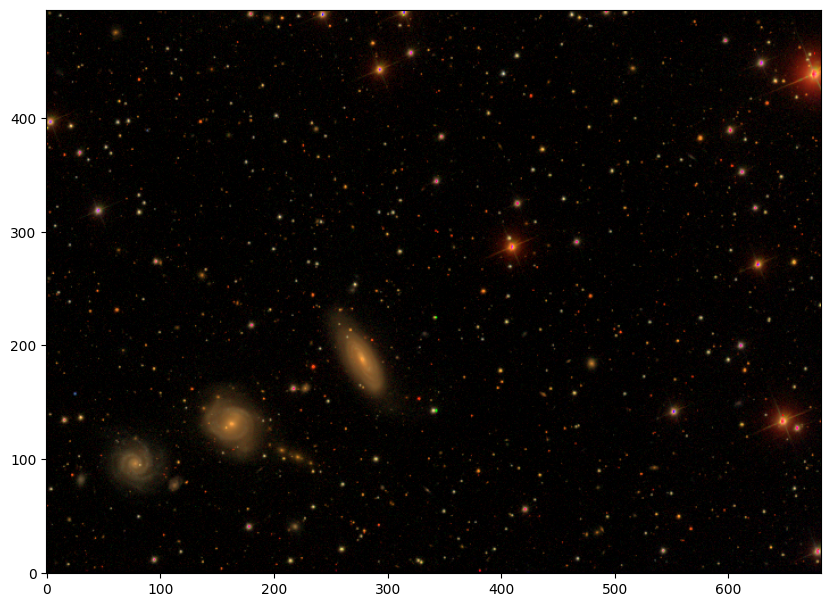

In [ ]:
rgb = make_lupton_rgb(i, r, g, Q=10, stretch=0.5, filename="ngc6976.jpeg")
plt.figure(figsize=(10, 8))
plt.imshow(rgb, origin='lower')

In [ ]:
# Get details about one filter
# Read headers
g_header = fits.getheader(g_name)
r_header = fits.getheader(r_name)
i_header = fits.getheader(i_name)

# Print header info
print("G-band header:")
print(g_header)

G-band header:
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  682                                                  NAXIS2  =                  496                                                  EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H TAI     =        4476739845.01 / 1st row - Number of seconds since Nov 17 1858  RA      =            313.72801 / 1st row - Right ascension of telescope boresighDEC     =            -6.295098 / 1st row - Declination of telescope boresight (dSPA     =               97.786 / 1st row - Camera col position angle wrt north (IPA     =              11

Get details about one filter: This FITS header provides information about the observation:

1. Observation Details:
- Date: September 27, 2000 at 02:50:45.01 TAI (DATE-OBS and TAIHMS)
- Filter: g-band (FILTER='g')
- Exposure time: 53.907 seconds (EXPTIME)
- Telescope: SDSS 2.5m telescope (TELESCOP='2.5m')

2. Image Properties:
- Image size: 682 x 496 pixels (NAXIS1 × NAXIS2)
- Data type: 32-bit floating point (BITPIX=-32)
- Units: nanomaggies (BUNIT='nanomaggy', where 1 nanomaggy = 3.631e-6 Jansky)

3. Target/Position Information:
- Right Ascension: 313.72801 degrees (RA)
- Declination: -6.295098 degrees (DEC)
- Object: "86 S" (OBJECT)
- Coordinate system: ICRS (RADECSYS)

4. SDSS-specific Information:
- Run number: 1737 (RUN)
- Frame number: 47 (FRAME)
- Camera column: 5 (CAMCOL)
- Rerun: 301 (RERUN)
- Stripe: 86 (STRIPE)
- Observation type: "science" (FLAVOR)

5. Calibration Information:
- Calibration factor: 0.00463552 nMgy per count (NMGY)
- Software bias: 1000 (SOFTBIAS)

This appears to be a science frame taken as part of the Sloan Digital Sky Survey (SDSS), specifically in the g-band filter. The image was taken in drift-scan mode (CCDMODE='DRIFT'), which was the standard observing mode for SDSS, where the telescope stays fixed and the sky drifts by while the camera reads out continuously.

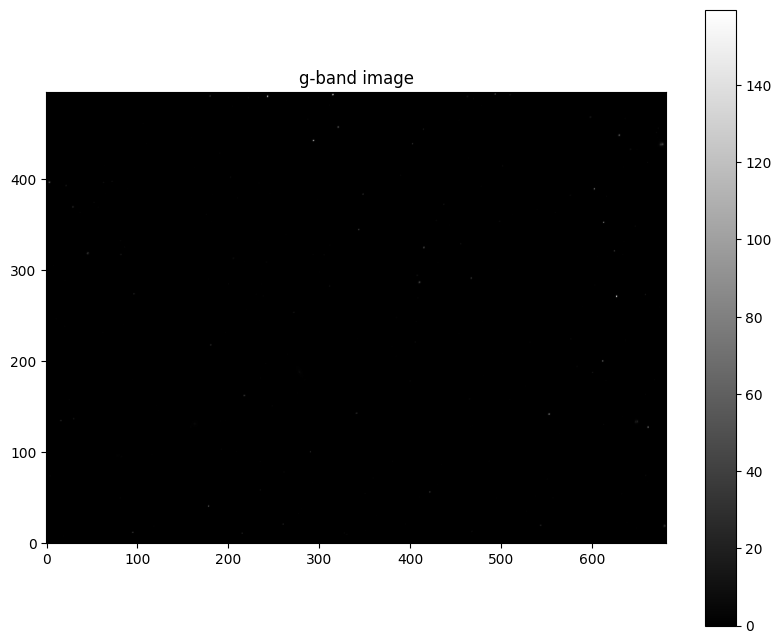

In [ ]:
# Visualizing a single filter image. Simple basic display
plt.figure(figsize=(10, 8))
plt.imshow(g, origin='lower', cmap='gray')
plt.colorbar()
plt.title('g-band image')
plt.show()

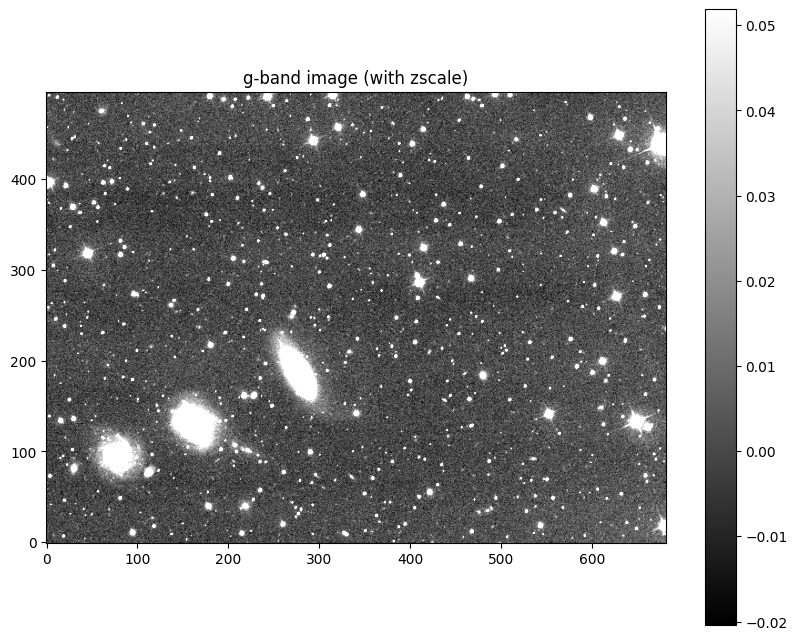

In [ ]:
# ZScaleInterval automatically adjusts contrast to show interesting features (better show dynamic range)
from astropy.visualization import ZScaleInterval, ImageNormalize

# Create normalization object
norm = ImageNormalize(g, interval=ZScaleInterval())

plt.figure(figsize=(10, 8))
plt.imshow(g, origin='lower', cmap='gray', norm=norm)
plt.colorbar()
plt.title('g-band image (with zscale)')
plt.show()

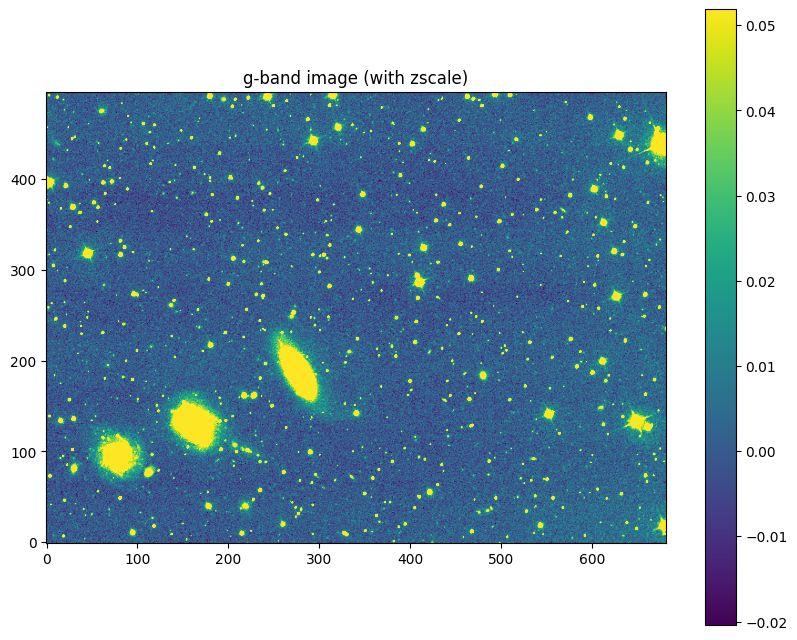

In [ ]:
# Use different colormaps by changing 'gray' to others like: 'viridis' , 'magma', 'hot' ,'jet'
from astropy.visualization import ZScaleInterval, ImageNormalize

# Create normalization object
norm = ImageNormalize(g, interval=ZScaleInterval())

plt.figure(figsize=(10, 8))
plt.imshow(g, origin='lower', cmap='viridis', norm=norm)
plt.colorbar()
plt.title('g-band image (with zscale)')
plt.show()

**NGC 6975 - Load files and process**

Loading galaxy data from:
* https://skyserver.sdss.org/dr18/VisualTools/explore/summary?name=NGC%206975&ra=313.1084419845900&dec=-05.7723173124500
* https://skyserver.sdss.org/dr18/VisualTools/explore/fitsimg?id=1237652935641858730&spec=&apid=&fieldId=0x112d06c9a0270000&ra=313.108952897284&dec=-5.77174594873709&plateId=&mangaid=

Vailable data:
* u: Ultraviolet band (centered at approximately 354 nm)
* g: Green band (centered at approximately 477 nm)
* r: Red band (centered at approximately 623 nm)
* i: Near-infrared band (centered at approximately 762 nm)
* z: Another infrared band, further in wavelength than i (centered at approximately 913 nm)

**We load u data, that is ultraviolett**

In [ ]:
!wget https://raw.githubusercontent.com/deltorobarba/astrophysics/master/file-u-001737-5-0039.fits
!wget https://raw.githubusercontent.com/deltorobarba/astrophysics/master/file-z-001737-5-0039.fits

--2024-12-09 15:33:03--  https://raw.githubusercontent.com/deltorobarba/astrophysics/master/file-u-001737-5-0039.fits
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12447360 (12M) [application/octet-stream]
Saving to: ‘file-u-001737-5-0039.fits’

file-u-001737-5-003 100%[===================>]  11.87M  --.-KB/s    in 0.1s    

2024-12-09 15:33:04 (106 MB/s) - ‘file-u-001737-5-0039.fits’ saved [12447360/12447360]

--2024-12-09 15:33:04--  https://raw.githubusercontent.com/deltorobarba/astrophysics/master/file-z-001737-5-0039.fits
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP req

In [ ]:
# Specify the path to the FITS file

#fits_file = './file-u-001737-5-0039.fits'
fits_file = './file-z-001737-5-0039.fits'

# Open the FITS file
hdul = fits.open(fits_file)

In [ ]:
# Alternative
# Example of manually downloading a FITS file if a URL is provided
import requests

url = "URL_to_FITS_file"  # Replace with the actual FITS file URL
response = requests.get(url)
with open("output.fits", "wb") as f:
    f.write(response.content)

# Open the FITS file
with fits.open("output.fits") as hdul:
    hdul.info()  # Display the structure of the FITS file
    data = hdul[0].data  # Access the data

In [ ]:
# Print the file information
hdul.info()

Filename: ./file-z-001737-5-0039.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      85   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [ ]:
# Access the primary hdul[0] data (if available)
primary_data = hdul[0].data
print(primary_data)  # Will print the data array if it exists (might be large)

[[-0.01589966  0.08874512  0.29833984 ...  0.140625    0.140625
   0.0625    ]
 [ 0.24584961  0.06262207  0.32421875 ...  0.24487305  0.45361328
   0.08850098]
 [ 0.21972656  0.03637695  0.16723633 ...  0.4013672   0.53125
   0.140625  ]
 ...
 [-0.02154541 -0.10009766  0.31884766 ... -0.36035156 -0.54296875
   0.23901367]
 [ 0.26660156 -0.20483398 -0.02154541 ... -0.25585938  0.05670166
   0.29101562]
 [ 0.29248047  0.13549805  0.26611328 ...  0.34326172  0.03063965
   0.05670166]]


In [ ]:
# Access the primary hdul[1] data (if available)
primary_data = hdul[1].data
print(primary_data)  # Will print the data array if it exists (might be large)

[0.02617414 0.02617777 0.02616826 ... 0.02605261 0.02605575 0.02604702]


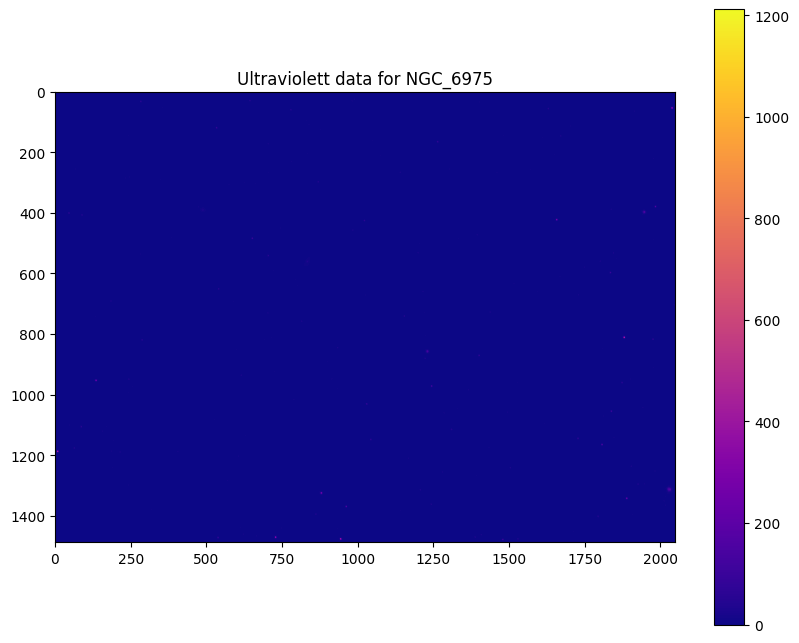

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(hdul[0].data[:, :], cmap='plasma', aspect='equal')
plt.colorbar()
plt.title("Ultraviolett data for NGC_6975")
plt.show()

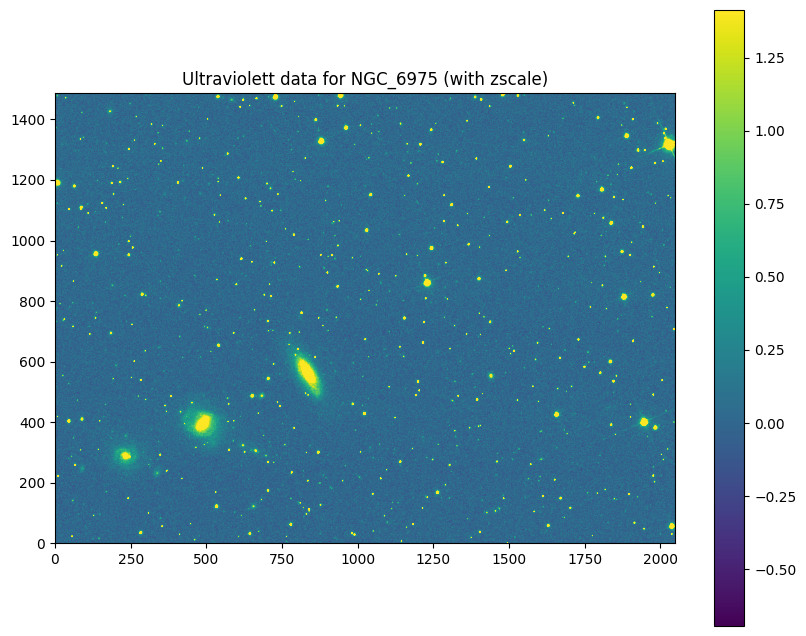

In [ ]:
# Using normalize to better show the dynamic range for contrast control
from astropy.visualization import ZScaleInterval, ImageNormalize

# Create normalization object
norm = ImageNormalize(hdul[0].data[:, :], interval=ZScaleInterval())

plt.figure(figsize=(10, 8))
plt.imshow(hdul[0].data[:, :], origin='lower', cmap='viridis', norm=norm)
plt.colorbar()
plt.title('Ultraviolett data for NGC_6975 (with zscale)')
plt.show()

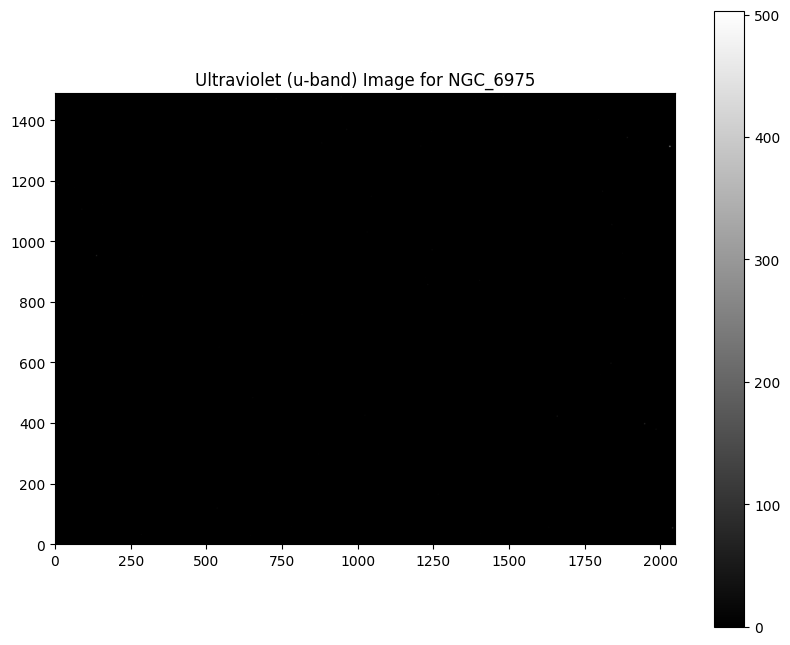

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt

norm = ImageNormalize(interval=ZScaleInterval())

# Open the FITS file
with fits.open('./file-u-001737-5-0039.fits') as hdul:
    # Display the primary image data
    image_data = hdul[0].data
    plt.figure(figsize=(10, 8))
    plt.imshow(image_data, cmap='gray', origin='lower', norm=norm)
    plt.colorbar()
    plt.title("Ultraviolet (u-band) Image for NGC_6975")
    plt.show()

**Additional Tools: Cutout**

In [ ]:
from astropy.nddata import Cutout2D
from astropy import units as u

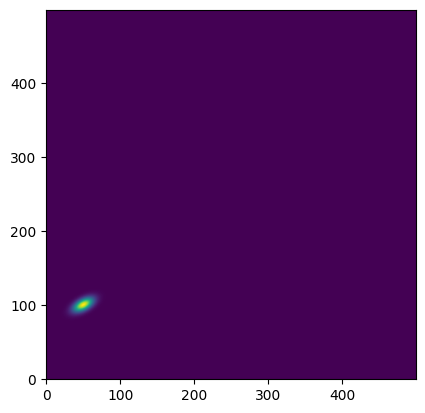

In [ ]:
import numpy as np
from astropy.modeling.models import Gaussian2D
y, x = np.mgrid[0:500, 0:500]
data = Gaussian2D(1, 50, 100, 10, 5, theta=0.5)(x, y)

import matplotlib.pyplot as plt
plt.imshow(data, origin='lower')

In [ ]:
from astropy.nddata import Cutout2D
from astropy import units as u
position = (49.7, 100.1)
size = (41, 51)     # pixels
cutout = Cutout2D(data, position, size)

The [cutout](https://docs.astropy.org/en/latest/nddata/utils.html) object can plot its bounding box on the original data using the plot_on_original() method:

<Axes: >

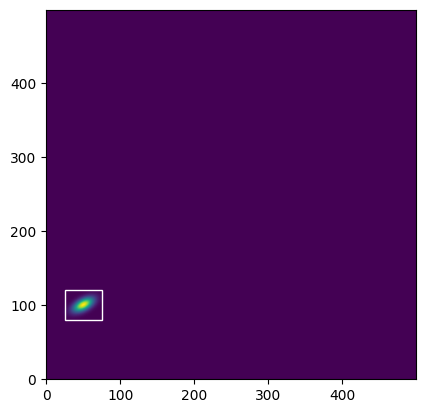

In [ ]:
plt.imshow(data, origin='lower')
cutout.plot_on_original(color='white')

Next we can create a cutout for the single object in this image. We create a cutout centered at position (x, y) = (49.7, 100.1) with a size of (ny, nx) = (41, 51) pixels:

In [ ]:
from astropy.nddata import Cutout2D
from astropy import units as u
position = (49.7, 100.1)
size = (41, 51)     # pixels
cutout = Cutout2D(data, position, size)

In [ ]:
# size keyword can also be a Quantity object:
size = u.Quantity((41, 51), u.pixel)
cutout = Cutout2D(data, position, size)

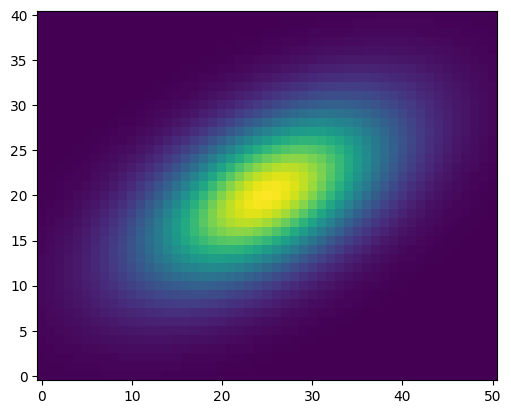

In [ ]:
cutout = Cutout2D(data, position, (41, 51))
plt.imshow(cutout.data, origin='lower')

In [ ]:
# Properties of the cutout array are also stored as attributes

# shape of the cutout array
print(cutout.shape)

# rounded pixel index of the input position
print(cutout.position_original)

# corresponding position in the cutout array
print(cutout.position_cutout)

# (non-rounded) input position in both the original and cutout arrays
print((cutout.input_position_original, cutout.input_position_cutout))

# the origin pixel in both arrays
print((cutout.origin_original, cutout.origin_cutout))

# tuple of slice objects for the original array
print(cutout.slices_original)

# tuple of slice objects for the cutout array
print(cutout.slices_cutout)

(41, 51)
(50, 100)
(25, 20)
((49.7, 100.1), (24.700000000000003, 20.099999999999994))
((25, 80), (0, 0))
(slice(80, 121, None), slice(25, 76, None))
(slice(0, 41, None), slice(0, 51, None))


https://www.webbdeepsky.com/galaxies/object?object=Hickson%2B88

https://docs.astropy.org/en/stable/visualization/rgb.html#astropy-visualization-rgb

https://docs.astropy.org/en/stable/api/astropy.utils.data.get_pkg_data_contents.html